In [1]:
#library installation

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install opencv-python
import cv2

In [2]:
import os

DATADIR = "C:/Users/LOQ/Downloads/archive (3)"

print("Main folder contents:")
print(os.listdir(DATADIR))

Main folder contents:
['Garbage classification', 'one-indexed-files-notrash_test.txt', 'one-indexed-files-notrash_train.txt', 'one-indexed-files-notrash_val.txt', 'one-indexed-files.txt', 'zero-indexed-files.txt']


In [3]:
INNER_DIR = r"C:/Users/LOQ/Downloads/archive (3)/Garbage classification/Garbage classification"
print (os.listdir(INNER_DIR))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


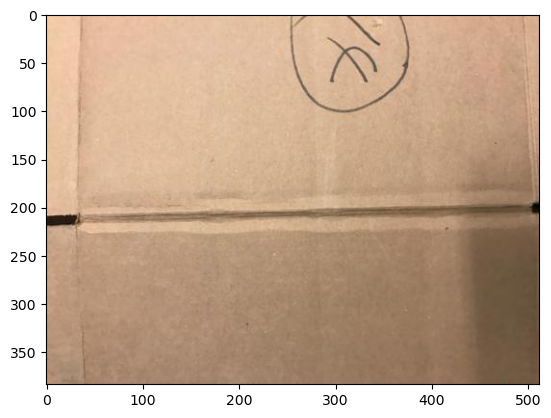

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

DATADIR = r"C:/Users/LOQ/Downloads/archive (3)/Garbage classification/Garbage classification"
CATEGORIES = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)
        plt.show()
        
        break  # show only 1 image per category
    break  # remove this if you want all categories

In [5]:
print(img_array.shape)

(384, 512, 3)


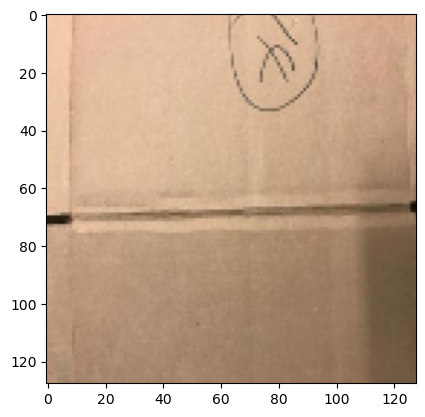

In [6]:
IMG_SIZE = 128
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()
training_data = []

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_array = cv2.imread(img_path)

                # Skip broken images
                if img_array is None:
                    continue

                # Convert BGR → RGB
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

                # Resize image
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

                training_data.append([new_array, class_num])

            except Exception as e:
                print("Error loading:", img_path)

create_training_data()
print("Total images loaded:", len(training_data))

Total images loaded: 2527


In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

3
3
2
1
4
5
3
0
1
2


In [10]:
X = []
Y = []

In [11]:
for features, label in training_data:
    X.append(features)
    Y.append(label)
X = np.array(X)
Y = np.array(Y)

In [12]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(Y),
    y=Y
)

class_weights = dict(enumerate(weights))
print(class_weights)

{0: np.float64(1.0450785773366418), 1: np.float64(0.8406520292747838), 2: np.float64(1.0272357723577237), 3: np.float64(0.7090347923681257), 4: np.float64(0.873789764868603), 5: np.float64(3.0742092457420926)}


In [13]:
np.save("X.npy", X)
np.save("Y.npy", Y)